## Project Name: Extrovert Introvert Behaviour Data

Project Type: EDA + Machine Learning Model Implementation 

Contribution & Member Name: Saurav Tripathi 

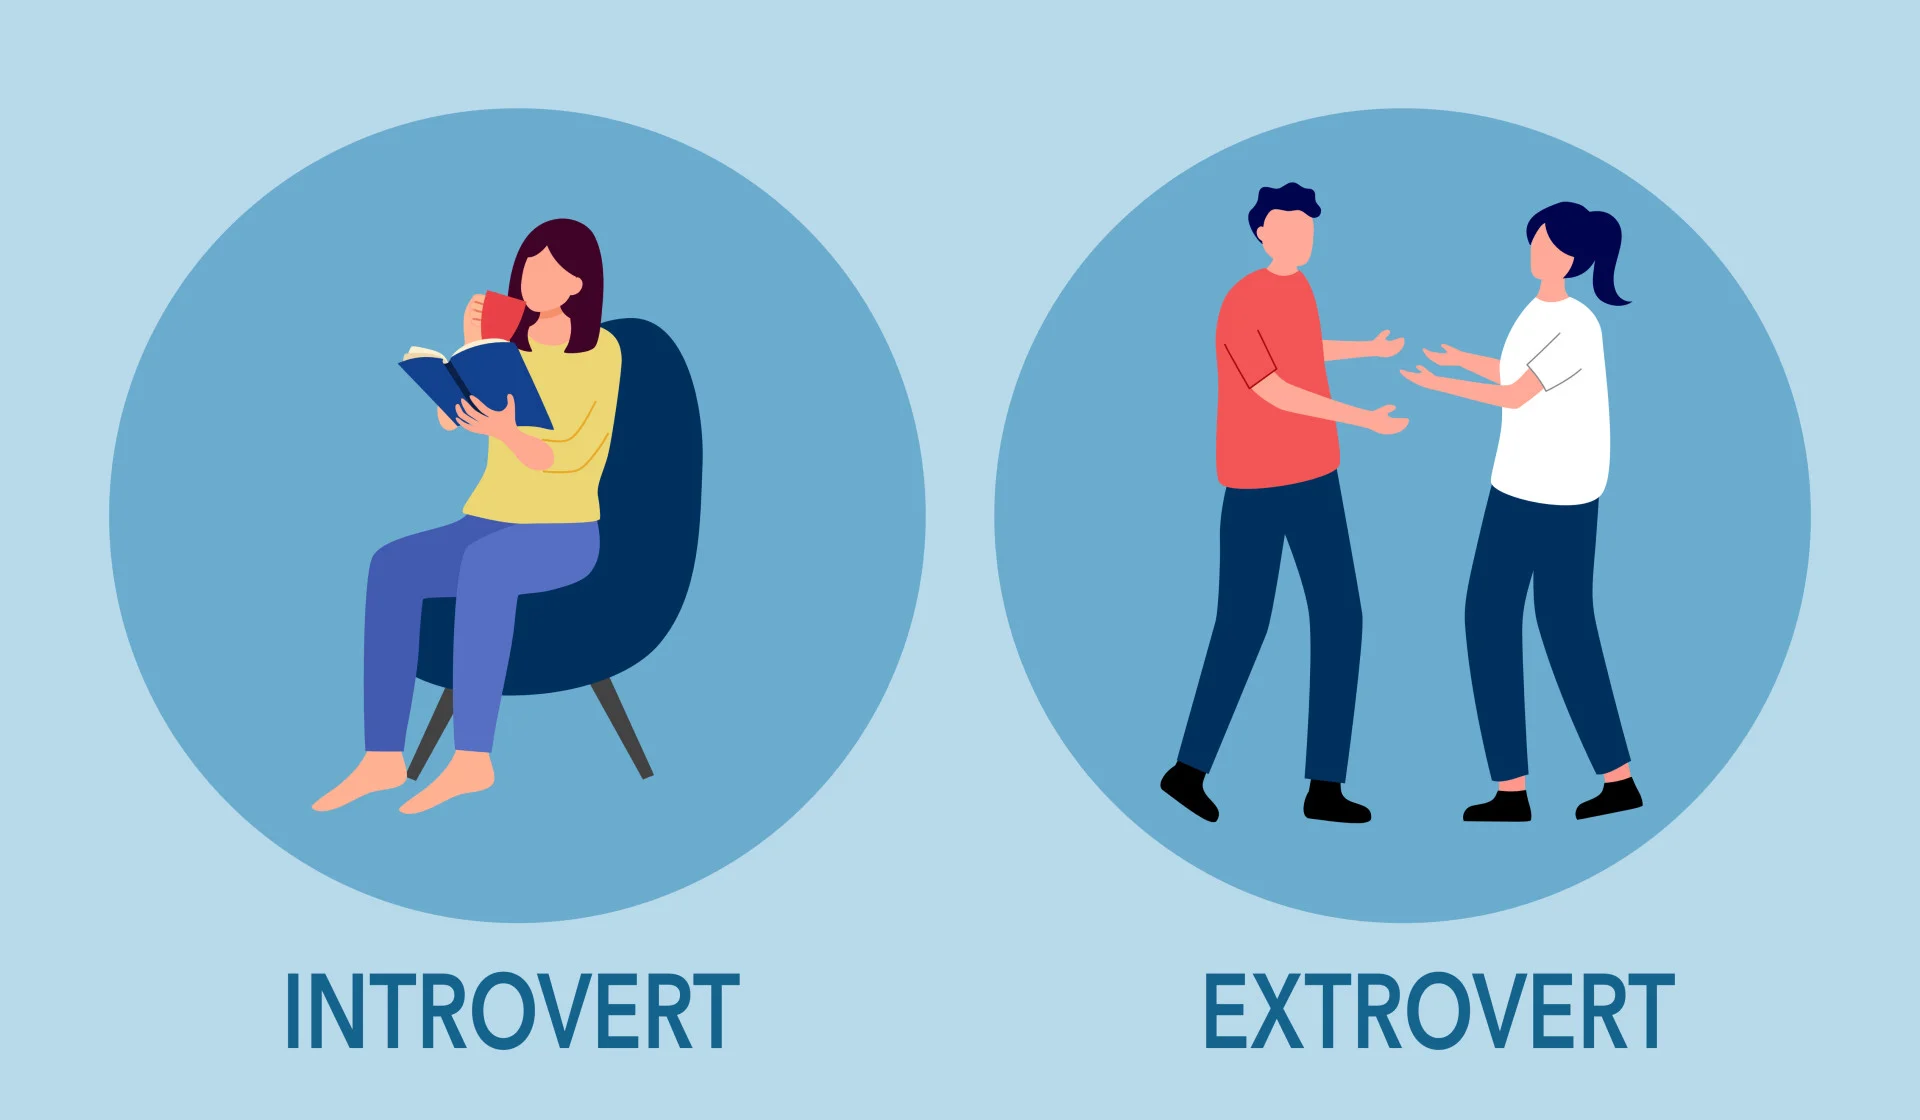

### Project Summary 

#### About Dataset

Overview

Dive into the Extrovert vs. Introvert Personality Traits Dataset, a rich collection of behavioral and social data designed to explore the spectrum of human personality. This dataset captures key indicators of extroversion and introversion, making it a valuable resource for psychologists, data scientists, and researchers studying social behavior, personality prediction, or data preprocessing techniques.

Context

Personality traits like extroversion and introversion shape how individuals interact with their social environments. This dataset provides insights into behaviors such as time spent alone, social event attendance, and social media engagement, enabling applications in psychology, sociology, marketing, and machine learning. Whether you're predicting personality types or analyzing social patterns, this dataset is your gateway to uncovering fascinating insights.

Dataset Details

Size: The dataset contains 2,900 rows and 8 columns.

Features:

    - Time_spent_Alone: Hours spent alone daily (0–11).
    - Stage_fear: Presence of stage fright (Yes/No).
    - Social_event_attendance: Frequency of social events (0–10).
    - Going_outside: Frequency of going outside (0–7).
    - Drained_after_socializing: Feeling drained after socializing (Yes/No).
    - Friends_circle_size: Number of close friends (0–15).
    - Post_frequency: Social media post frequency (0–10).
    - Personality: Target variable (Extrovert/Introvert).*


## Problem Statement: 

We need to bulid a Machine Learning Model which will help us to classify the Personality into 2 i.e Extrovert/Introvert

In [1]:
import pandas as pd 
import numpy as np

In [3]:
df=pd.read_csv("personality_dataset.csv")

In [4]:
df.head()

Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1.0            2.0   
3               0.0         No                      6.0            7.0   
4               3.0         No                      9.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 13.0             5.0   Extrovert  
1                       Yes                  0.0             3.0   Introvert  
2                       Yes                  5.0             2.0   Introvert  
3                        No                 14.0             8.0   Extrovert  
4                        No                  8.0             5.0   Extrovert

In [5]:
df.shape

(2900, 8)

There are 2900 Rows and 8 Feature Columns

In [6]:
df.size

23200

In [7]:
df['Personality'].value_counts()

Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64

Here we can know that our dataset is some what balanced.

In [8]:
df.sample(10)

Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
726               10.0        Yes                      3.0            1.0   
490               10.0        Yes                      2.0            1.0   
2543               1.0         No                      4.0            4.0   
2279               4.0        Yes                      3.0            2.0   
2644               1.0         No                      NaN            6.0   
398                2.0         No                      4.0            5.0   
1093               2.0         No                      4.0            7.0   
503                9.0        Yes                      3.0            0.0   
244                5.0        Yes                      0.0            1.0   
637                8.0        Yes                      2.0            2.0   

     Drained_after_socializing  Friends_circle_size  Post_frequency  \
726                        Yes                  2.0             2.0   
490                        Yes                  1.0             2.0   
2543                        No                 13.0             7.0   
2279                       Yes                  3.0             2.0   
2644                        No                  8.0             6.0   
398                         No                  7.0             3.0   
1093                        No                 14.0             6.0   
503                        Yes                  4.0             0.0   
244                        Yes                  2.0             2.0   
637                        Yes                  5.0             1.0   

     Personality  
726    Introvert  
490    Introvert  
2543   Extrovert  
2279   Introvert  
2644   Extrovert  
398    Extrovert  
1093   Extrovert  
503    Introvert  
244    Introvert  
637    Introvert

In [9]:
df.dtypes

Time_spent_Alone             float64
Stage_fear                    object
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing     object
Friends_circle_size          float64
Post_frequency               float64
Personality                   object
dtype: object

In [10]:
df.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [11]:
df[df.isnull().any(axis=1)].shape

(423, 8)

From here we understand we have some null/empty values in each columns. 

In [12]:
df.isna().sum()/len(df) * 100

Time_spent_Alone             2.172414
Stage_fear                   2.517241
Social_event_attendance      2.137931
Going_outside                2.275862
Drained_after_socializing    1.793103
Friends_circle_size          2.655172
Post_frequency               2.241379
Personality                  0.000000
dtype: float64

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
missing_values=pd.DataFrame((df.isnull().sum() *100/len(df)).reset_index())

In [16]:
missing_values #Shows the percentage of missing values from each columns

index         0
0           Time_spent_Alone  2.172414
1                 Stage_fear  2.517241
2    Social_event_attendance  2.137931
3              Going_outside  2.275862
4  Drained_after_socializing  1.793103
5        Friends_circle_size  2.655172
6             Post_frequency  2.241379
7                Personality  0.000000

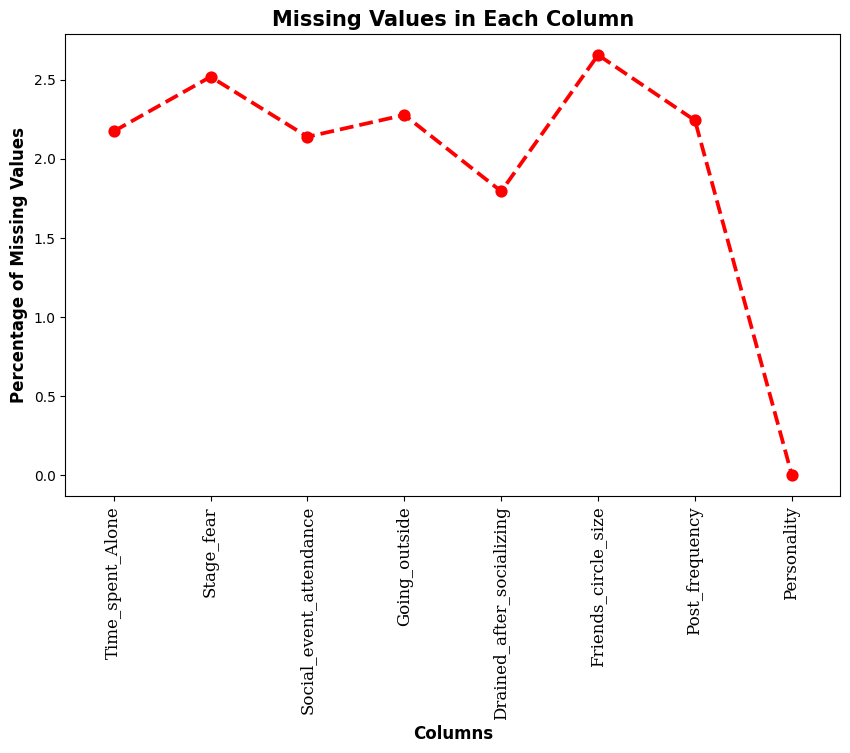

In [17]:
plt.figure(figsize=(10,6))

ax=sns.pointplot(x='index',y=0,data=missing_values,color='red',markers='o',linestyle='--')

plt.xticks(rotation=90,font='serif',fontsize=12)

plt.title('Missing Values in Each Column',fontsize=15,fontweight='bold')
plt.xlabel('Columns',fontsize=12,fontweight='bold')
plt.ylabel('Percentage of Missing Values',fontsize=12,fontweight='bold')        
plt.show()

In [18]:
df.head(5)

Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1.0            2.0   
3               0.0         No                      6.0            7.0   
4               3.0         No                      9.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 13.0             5.0   Extrovert  
1                       Yes                  0.0             3.0   Introvert  
2                       Yes                  5.0             2.0   Introvert  
3                        No                 14.0             8.0   Extrovert  
4                        No                  8.0             5.0   Extrovert

In [19]:
df.describe()

Time_spent_Alone  Social_event_attendance  Going_outside  \
count       2837.000000              2838.000000    2834.000000   
mean           4.505816                 3.963354       3.000000   
std            3.479192                 2.903827       2.247327   
min            0.000000                 0.000000       0.000000   
25%            2.000000                 2.000000       1.000000   
50%            4.000000                 3.000000       3.000000   
75%            8.000000                 6.000000       5.000000   
max           11.000000                10.000000       7.000000   

       Friends_circle_size  Post_frequency  
count          2823.000000     2835.000000  
mean              6.268863        3.564727  
std               4.289693        2.926582  
min               0.000000        0.000000  
25%               3.000000        1.000000  
50%               5.000000        3.000000  
75%              10.000000        6.000000  
max              15.000000       10.000000

According to the dataset, the columns are as follows:

**Time_spent_Alone**  
- **Mean** → 4.50 hrs  
- **Std Dev** → 3.48 hrs  
- **Min** → 0 hrs  
- **Max** → 11 hrs  
- **25%** → 2.00 hrs  
- **50% (Median)** → 4.00 hrs  
- **75%** → 8.00 hrs  
- **Insight**: Appears to be roughly normally distributed with a slight right skew. A few people spend significantly more time alone, which might indicate introversion.

---

**Social_event_attendance**  
- **Mean** → 3.96  
- **Std Dev** → 2.90  
- **Min** → 0  
- **Max** → 10  
- **25%** → 2.00  
- **50% (Median)** → 3.00  
- **75%** → 6.00  
- **Insight**: Skewed toward lower values. Most people attend less than 4 events per week, which may suggest more introverted tendencies for the majority.

---

**Going_outside**  
- **Mean** → 3.00  
- **Std Dev** → 2.24  
- **Min** → 0  
- **Max** → 7  
- **25%** → 1.00  
- **50% (Median)** → 3.00  
- **75%** → 5.00  
- **Insight**: Fairly balanced distribution around the mean. Could help differentiate between introverts and extroverts based on outdoor activity.

---

**Friends_circle_size**  
- **Mean** → 6.26  
- **Std Dev** → 4.29  
- **Min** → 0  
- **Max** → 15  
- **25%** → 3.00  
- **50% (Median)** → 5.00  
- **75%** → 10.00  
- **Insight**: Widely spread distribution. Higher values may indicate extroversion; smaller values could hint at introversion.

---

**Post_frequency**  
- **Mean** → 3.56  
- **Std Dev** → 2.93  
- **Min** → 0  
- **Max** → 10  
- **25%** → 1.00  
- **50% (Median)** → 3.00  
- **75%** → 6.00  
- **Insight**: Skewed slightly right. Most users post less than 4 times a week. Higher post frequency may correlate with extroversion.


## Encoding

In [20]:
df.head()

Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1.0            2.0   
3               0.0         No                      6.0            7.0   
4               3.0         No                      9.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 13.0             5.0   Extrovert  
1                       Yes                  0.0             3.0   Introvert  
2                       Yes                  5.0             2.0   Introvert  
3                        No                 14.0             8.0   Extrovert  
4                        No                  8.0             5.0   Extrovert

**Label Encoding**

Stage Fear: 

Yes---> 1


No----> 0

In [21]:
df['Stage_fear']=df['Stage_fear'].map({'Yes':1,'No':0})

**Label Encoding**

Drained_after_socializing: 

Yes---> 1


No----> 0

In [22]:
df['Drained_after_socializing']=df['Drained_after_socializing'].map({'Yes':1,'No':0})

## Univariate Analysis 

Analysis of single variable 

In [23]:
df.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [24]:
kde_columns = [
    'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency'
]

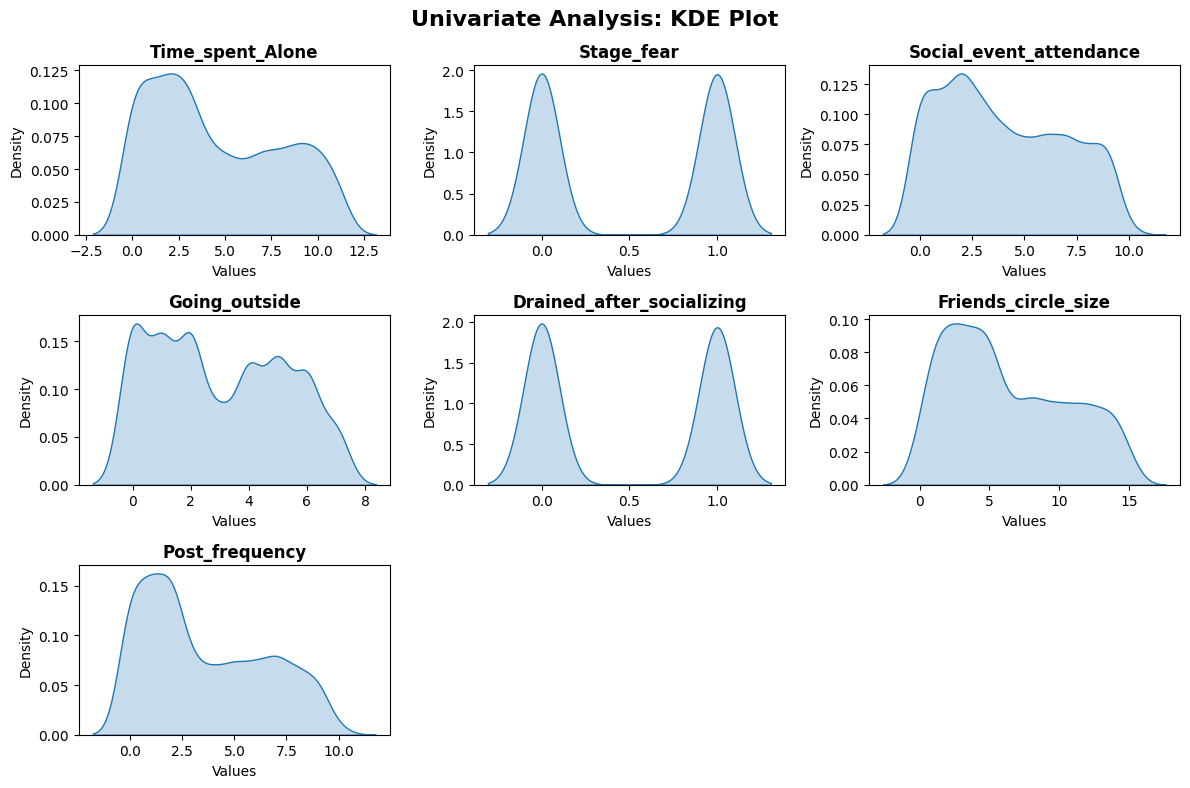

In [25]:
plt.figure(figsize=(12,8))
plt.suptitle('Univariate Analysis: KDE Plot', fontsize=16, fontweight='bold')

for i in range(len(kde_columns)):
    plt.subplot(3, 3, i + 1)
    sns.kdeplot(data=df, x=kde_columns[i], fill=True)
    plt.title(kde_columns[i], fontsize=12, fontweight='bold')
    plt.xlabel('Values', fontsize=10)
    plt.ylabel('Density', fontsize=10)

plt.tight_layout()
plt.show()

### 1. Time_spent_Alone

- Distribution is **right-skewed**.
- Most people spend **0–4 hours alone**, peaking near **2 hours**.
- A smaller group spends **8+ hours alone**, suggesting **potential introverts**.

**Insight**: Likely an important feature — higher values may correlate with introversion(introverts).

---
### 2. Stage_fear

- Clearly bimodal with peaks at 0 and 1 (binary).

- Fairly balanced distribution, so both groups ("Yes" and "No") are well represented.

**Insight:** Could be a good separator if introverts show higher stage fear (1).

---
### 3. Social_event_attendance

- **Right-skewed** distribution.
- Most people attend **0–4 events/week**, with a peak around **2**.
- Frequency drops gradually as attendance increases.

**Insight**: Fewer social events is common and may align with introverted behavior. Could be a strong predictor.

---

### 4. Going_outside

- Appears **multi-modal**, with visible peaks around **1, 3, and 6**.
- Evenly spread, though more people go out less than 5 times a week.
- A few consistently go out every day.

**Insight**: Balanced spread; combined with other variables, this may help distinguish personalities.

---

### 5. Drained_after_socializing

- Strongly bimodal, peaking at 0 and 1 (as expected for binary).

- Looks fairly balanced, indicating good class representation.

**Insight:** If 1 = "Yes", people who feel drained could tend toward introversion — this may have predictive value.

---

### 6. Friends_circle_size

- Slight **right-skew**, most values fall between **3 and 10**.
- A long tail toward larger friend groups (up to 15).
- Peak around **3–5 friends**.

**Insight**: People with smaller circles might lean toward introversion; larger circles may signal extroversion.

---

### 7. Post_frequency

- **Right-skewed** distribution.
- Most people post **1–3 times per week**, peaking around **2**.
- Only a few post very frequently (near 10).

**Insight**: Higher posting frequency may be linked to extroversion, while the majority lean toward lower activity.


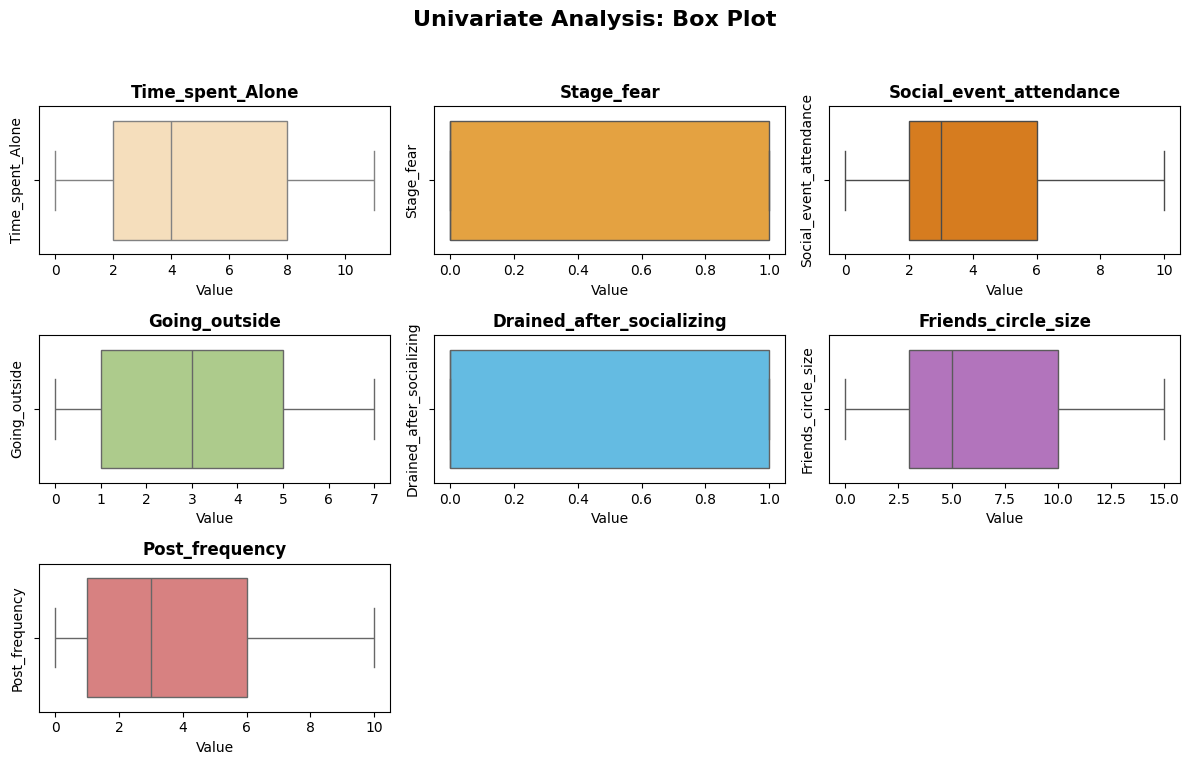

In [26]:
colors = ["#FFE0B2", "#FFA726", "#F57C00", "#AED581", "#4FC3F7", "#BA68C8", "#E57373", "#DCE775", "#FF8A65"]

plt.figure(figsize=(12, 8))
plt.suptitle('Univariate Analysis: Box Plot', fontsize=16, fontweight='bold')

for i in range(min(len(kde_columns), 9)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x=kde_columns[i], color=colors[i % len(colors)])  
    plt.title(kde_columns[i], fontsize=12, fontweight='bold')
    plt.xlabel('Value', fontsize=10)
    plt.ylabel(kde_columns[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 1. **Time_spent_Alone**
- Median is around **4 hours**, with most values between **2 and 8 hours**.
- A few mild outliers may exist above **10**.
- Symmetric distribution with **slight right skew**.

**Insight:** Majority of people spend a moderate amount of time alone. Those with very high solitude may be introverts.

---

### 2. **Stage_fear**
- Only two possible values (**0 and 1**).
- Box plot shows just a thick bar between 0 and 1 (typical for binary data).
- **Balanced split** between those who have stage fear and those who don’t.

**Insight:** Good for classification, but not much to interpret in box plot format since it’s binary.

---

### 3. **Social_event_attendance**
- Median is around **3–4 events/week**.
- Interquartile range (IQR) is between **2 and 6**.
- A few potential mild outliers beyond **8–10**.

**Insight:** Most people attend few events, consistent with introvert-leaning distribution.

---

### 4. **Going_outside**
- Median is about **3–4 times/week**.
- Values are well spread across the week (**0 to 7**).
- **No visible outliers**.

**Insight:** Balanced outdoor activity among participants. May help in personality classification.

---

### 5. **Drained_after_socializing**
- **Binary feature** (0 or 1), like Stage_fear.
- Box plot again shows only two distinct bars.

**Insight:** Well balanced — this binary response is likely important for predicting personality type.

---

### 6. **Friends_circle_size**
- Median is around **5–6 friends**.
- IQR is **3 to 10**.
- A few high values approaching **15**, but not extreme outliers.

**Insight:** Most people have small-to-medium friend groups. Larger friend circles may indicate extroversion.

---

### 7. **Post_frequency**
- Median around **3–4 posts/week**.
- IQR spans from **1 to 6**.
- Very few people post near the maximum (**10**), but **no strong outliers**.

**Insight:** Majority of users are low to moderate posters. Frequent posting could correlate with extroversion.


In [27]:
df['Personality']=df['Personality'].map({'Introvert': 0, 'Extrovert': 1})

**Label Encoding** 

Personality: 

Introvert --> 0

Extrovert --> 1

In [28]:
df.head()

Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         0.0                      4.0            6.0   
1               9.0         1.0                      0.0            0.0   
2               9.0         1.0                      1.0            2.0   
3               0.0         0.0                      6.0            7.0   
4               3.0         0.0                      9.0            4.0   

   Drained_after_socializing  Friends_circle_size  Post_frequency  Personality  
0                        0.0                 13.0             5.0            1  
1                        1.0                  0.0             3.0            0  
2                        1.0                  5.0             2.0            0  
3                        0.0                 14.0             8.0            1  
4                        0.0                  8.0             5.0            1

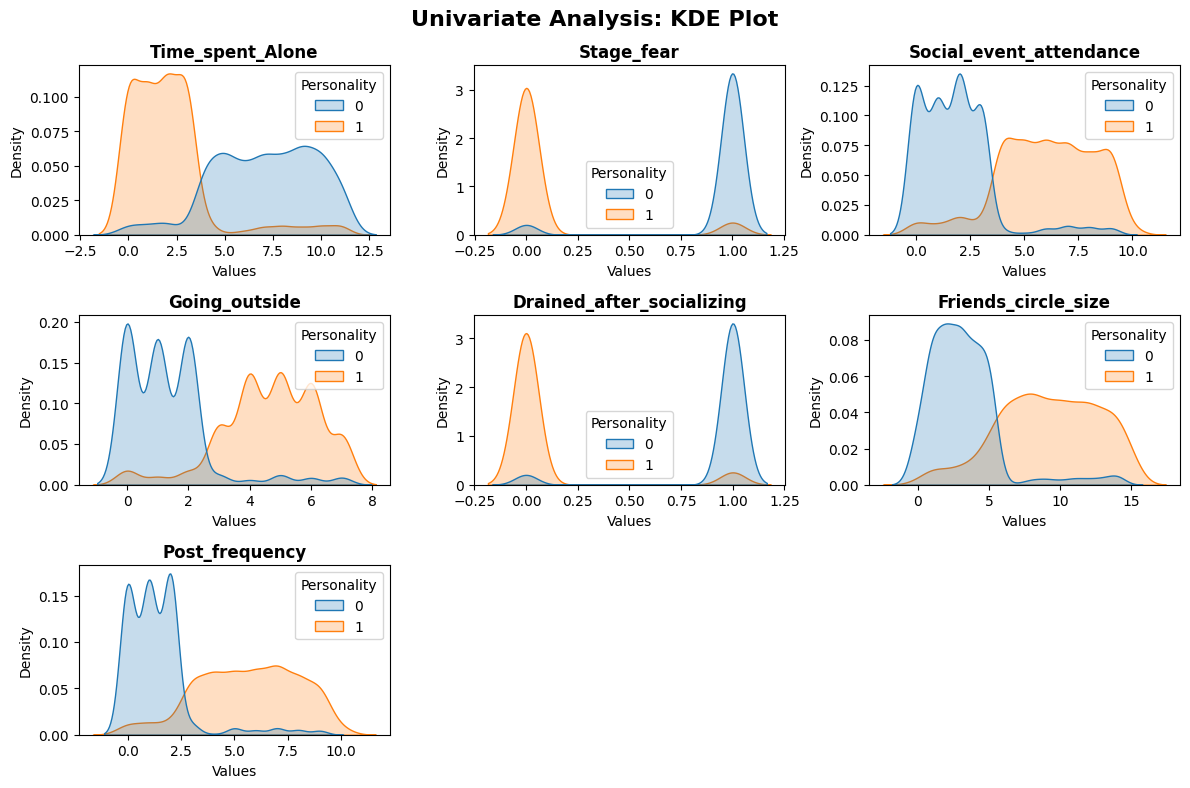

In [29]:
plt.figure(figsize=(12,8))
plt.suptitle('Univariate Analysis: KDE Plot', fontsize=16, fontweight='bold')

for i in range(len(kde_columns)):
    plt.subplot(3, 3, i + 1)
    sns.kdeplot(data=df, x=kde_columns[i],hue='Personality', fill=True)
    plt.title(kde_columns[i], fontsize=12, fontweight='bold')
    plt.xlabel('Values', fontsize=10)
    plt.ylabel('Density', fontsize=10)

plt.tight_layout()
plt.show()

### **1. Time_spent_Alone**
- **Introverts**: Tend to spend **more time alone**, with a peak around 6–8 hours.
- **Extroverts**: Mostly spend **1–3 hours alone**.
- **Insight**: Strong separator between introverts and extroverts.

---

### **2. Stage_fear**
- **Introverts**: Mostly have **stage fear** (`1`).
- **Extroverts**: Mostly **no stage fear** (`0`).
- **Insight**: Clear binary distinction; highly informative.

---

### **3. Social_event_attendance**
- **Introverts**: Cluster around **0–3 events/week**.
- **Extroverts**: Attend **5–8 events/week**.
- **Insight**: Strong behavioral difference; good predictor.

---

### **4. Going_outside**
- **Introverts**: Go outside less frequently (**0–3 times/week**).
- **Extroverts**: Peak at **5–7 times/week**.
- **Insight**: Good behavioral signal.

---

### **5. Drained_after_socializing**
- **Introverts**: Mostly feel **drained (1)**.
- **Extroverts**: Mostly **do not feel drained (0)**.
- **Insight**: Another clear binary split.

---

### **6. Friends_circle_size**
- **Introverts**: Have **2–5 close friends** on average.
- **Extroverts**: Cluster around **8–12+ friends**.
- **Insight**: Reflects social preference clearly.

---

### **7. Post_frequency**
- **Introverts**: Post less frequently (**1–2 times/week**).
- **Extroverts**: Post more (**5–8 times/week**).
- **Insight**: Social media activity aligns with personality.


## Bivariant Analysis 

Analysis with 2 variables 

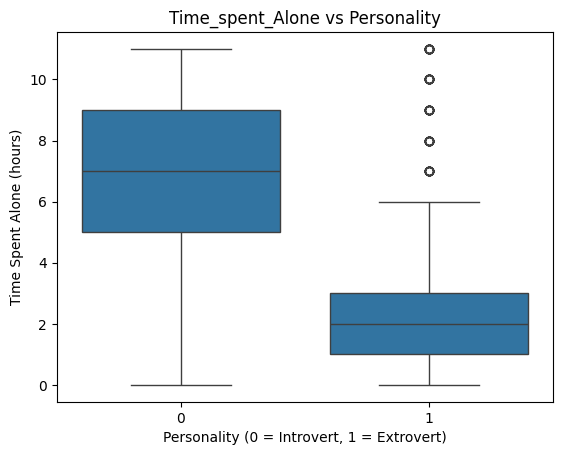

In [30]:
sns.boxplot(data=df, x='Personality', y='Time_spent_Alone')
plt.title('Time_spent_Alone vs Personality')
plt.xlabel('Personality (0 = Introvert, 1 = Extrovert)')
plt.ylabel('Time Spent Alone (hours)')
plt.show()

### Insight: Time_spent_Alone vs Personality

#### Introverts (`Personality = 0`)
- Spend **significantly more time alone**.
- Median time alone is around **7 hours**.
- Majority spend between **5 to 10 hours alone**.
- The range is wide (0 to 11 hrs), with very few outliers.

#### Extroverts (`Personality = 1`)
- Spend **much less time alone** on average.
- Median is around **2 hours**.
- Most values fall between **1 to 4 hours**.
- A few outliers (7+ hours) exist but are rare.

---

### Conclusion:
**Introverts tend to spend more time alone than extroverts**, supporting the behavioral assumption.  
`Time_spent_Alone` is a strong distinguishing feature and useful for classification.


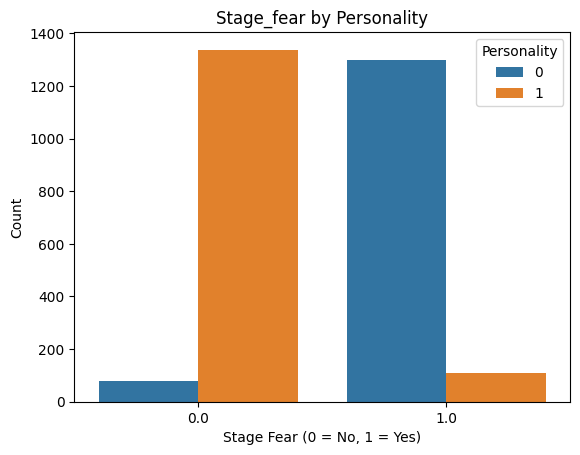

In [31]:
sns.countplot(data=df, x='Stage_fear', hue='Personality')
plt.title('Stage_fear by Personality')
plt.xlabel('Stage Fear (0 = No, 1 = Yes)')
plt.ylabel('Count')
# plt.legend(title='Personality (0 = Introvert, 1 = Extrovert)', label='Inline label')
plt.show()

### Stage Fear vs Personality – Insights


#### Observations:

1. **Introverts (Personality = 0):**
   - A **large number** of introverts report having **stage fear** (`Stage_fear = 1`).
   - Only a **small fraction** of introverts do **not** have stage fear (`Stage_fear = 0`).

2. **Extroverts (Personality = 1):**
   - A **majority** of extroverts report having **no stage fear** (`Stage_fear = 0`).
   - A **much smaller group** of extroverts report experiencing stage fear.

#### Interpretation:

- **Stage fear is significantly more prevalent among introverts** than extroverts.
- This aligns with personality traits — **introverts** tend to avoid attention-heavy situations, while **extroverts** are more comfortable in social/public settings.



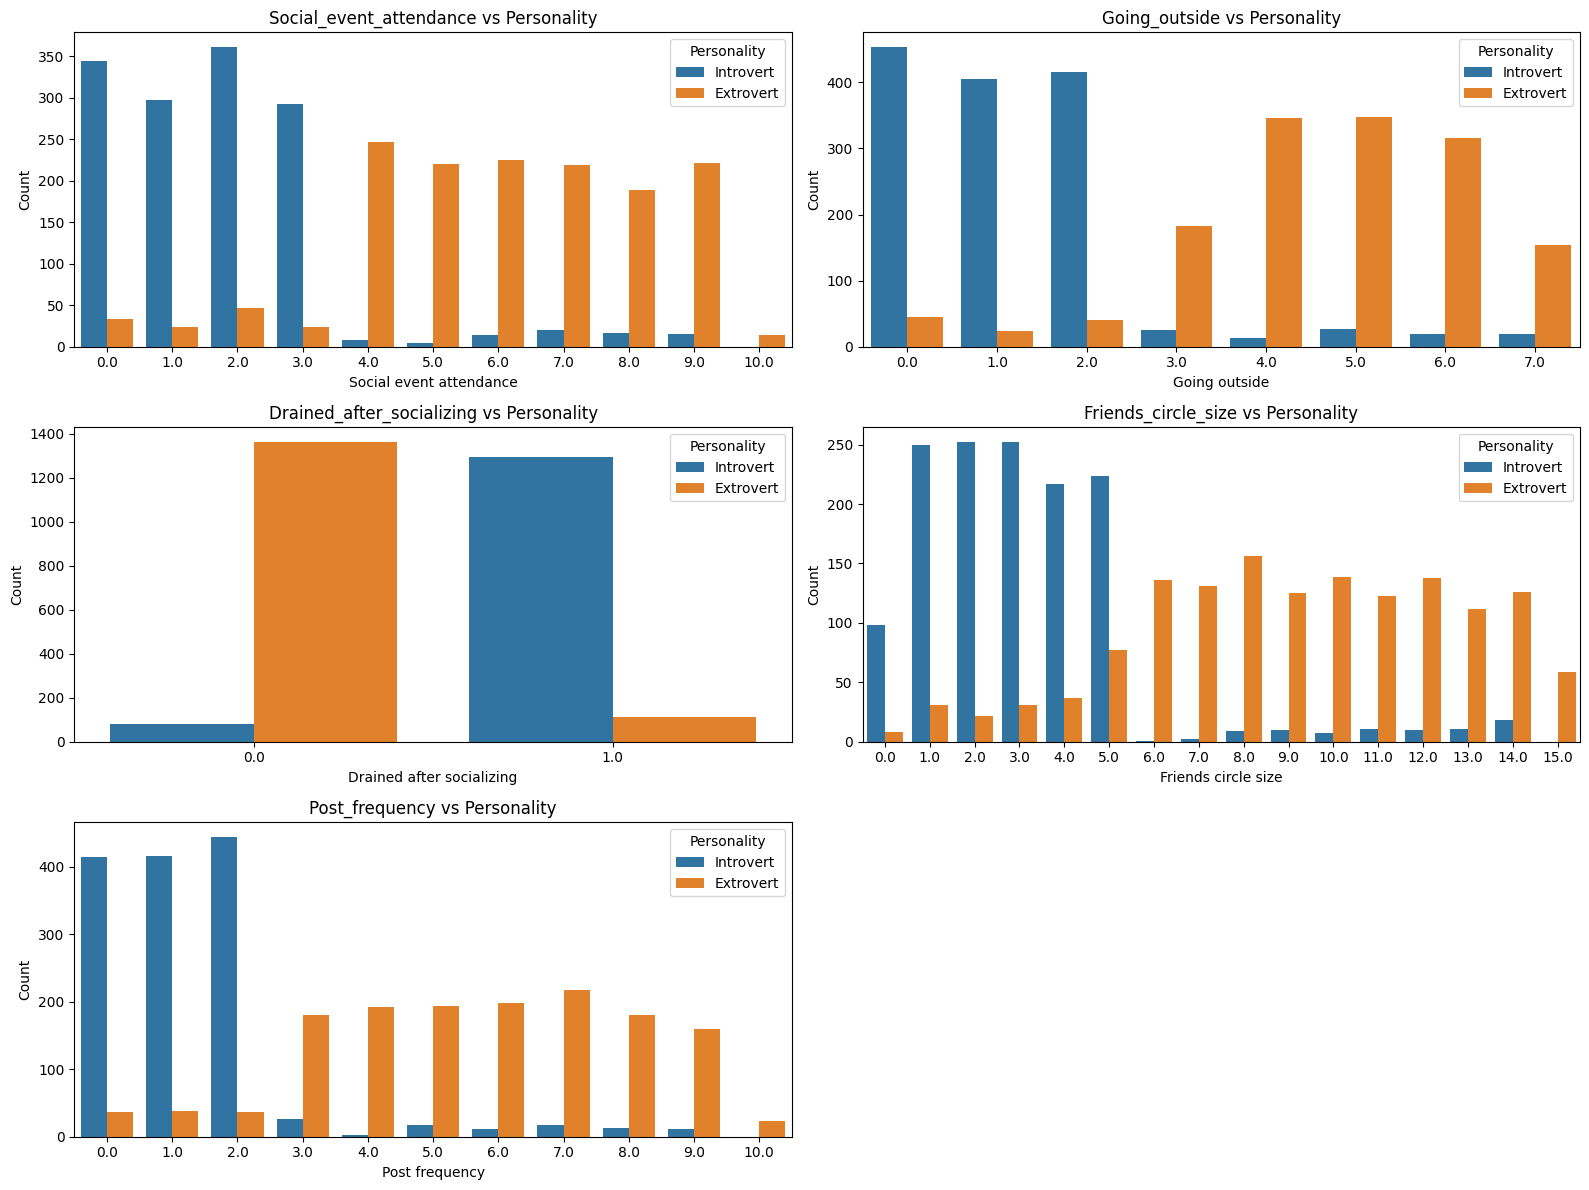

In [32]:
columns = [
    'Social_event_attendance',
    'Going_outside',
    'Drained_after_socializing',
    'Friends_circle_size',
    'Post_frequency'
]

# Create subplots
plt.figure(figsize=(16, 12))

for i, col in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=col, hue='Personality')
    plt.title(f'{col} vs Personality')
    plt.xlabel(col.replace('_', ' '))
    plt.ylabel('Count')
    plt.legend(
        title='Personality',
        labels=['Introvert', 'Extrovert']  # Assuming 0 = Introvert, 1 = Extrovert
    )

plt.tight_layout()
plt.show()

---

#### 1. **Social Event Attendance**
- **Introverts** (blue) attend **fewer** social events (mostly in the 0–3 range).
- **Extroverts** (orange) are more likely to attend events frequently (4–10 range).
- There’s a **strong contrast** in how socially active both groups are.

---

#### 2. **Going Outside**
- **Introverts** prefer staying indoors (values 0–2 are most common).
- **Extroverts** are much more likely to go outside regularly (4–7 range).
- This reflects their **opposing social inclinations**.

---

#### 3. **Drained After Socializing**
- A **majority of introverts** feel **drained** after socializing (`1` = yes).
- In contrast, most **extroverts** report **not** feeling drained (`0` = no).
- This aligns with classic personality theory — introverts recharge alone, while extroverts recharge through interaction.

---

#### 4. **Friends Circle Size**
- **Introverts** tend to have **smaller friend circles** (0–4 range).
- **Extroverts** dominate the higher values (6–15), indicating **larger social networks**.
- This supports the idea that introverts prefer **deep, limited connections**, while extroverts manage broader networks.

---

#### 5. **Post Frequency**
- **Introverts** show low activity on social platforms (0–2 range).
- **Extroverts** are more active online, especially in the 4–10 range.
- Indicates that extroverts seek **social engagement even in digital spaces**.

---

### Overall Interpretation
- Behavioral patterns show a **clear distinction** between introverts and extroverts.
- These features can serve as **strong predictors** for personality classification.
- The trends observed are **psychologically consistent** and reinforce traditional definitions of personality types.
--------------

## MultiVariant Analysis

In [33]:
df.corr()

Time_spent_Alone  Stage_fear  \
Time_spent_Alone                   1.000000    0.859387   
Stage_fear                         0.859387    1.000000   
Social_event_attendance           -0.733011   -0.860010   
Going_outside                     -0.750760   -0.882223   
Drained_after_socializing          0.860167    1.000000   
Friends_circle_size               -0.717185   -0.835318   
Post_frequency                    -0.732649   -0.854477   
Personality                       -0.720312   -0.865795   

                           Social_event_attendance  Going_outside  \
Time_spent_Alone                         -0.733011      -0.750760   
Stage_fear                               -0.860010      -0.882223   
Social_event_attendance                   1.000000       0.747756   
Going_outside                             0.747756       1.000000   
Drained_after_socializing                -0.859627      -0.882207   
Friends_circle_size                       0.734795       0.736390   
Post_frequency                            0.744615       0.770819   
Personality                               0.729417       0.747794   

                           Drained_after_socializing  Friends_circle_size  \
Time_spent_Alone                            0.860167            -0.717185   
Stage_fear                                  1.000000            -0.835318   
Social_event_attendance                    -0.859627             0.734795   
Going_outside                              -0.882207             0.736390   
Drained_after_socializing                   1.000000            -0.834689   
Friends_circle_size                        -0.834689             1.000000   
Post_frequency                             -0.852247             0.707888   
Personality                                -0.866737             0.696507   

                           Post_frequency  Personality  
Time_spent_Alone                -0.732649    -0.720312  
Stage_fear                      -0.854477    -0.865795  
Social_event_attendance          0.744615     0.729417  
Going_outside                    0.770819     0.747794  
Drained_after_socializing       -0.852247    -0.866737  
Friends_circle_size              0.707888     0.696507  
Post_frequency                   1.000000     0.729287  
Personality                      0.729287     1.000000

Text(0.5, 1.0, 'Correlation Heatmap')

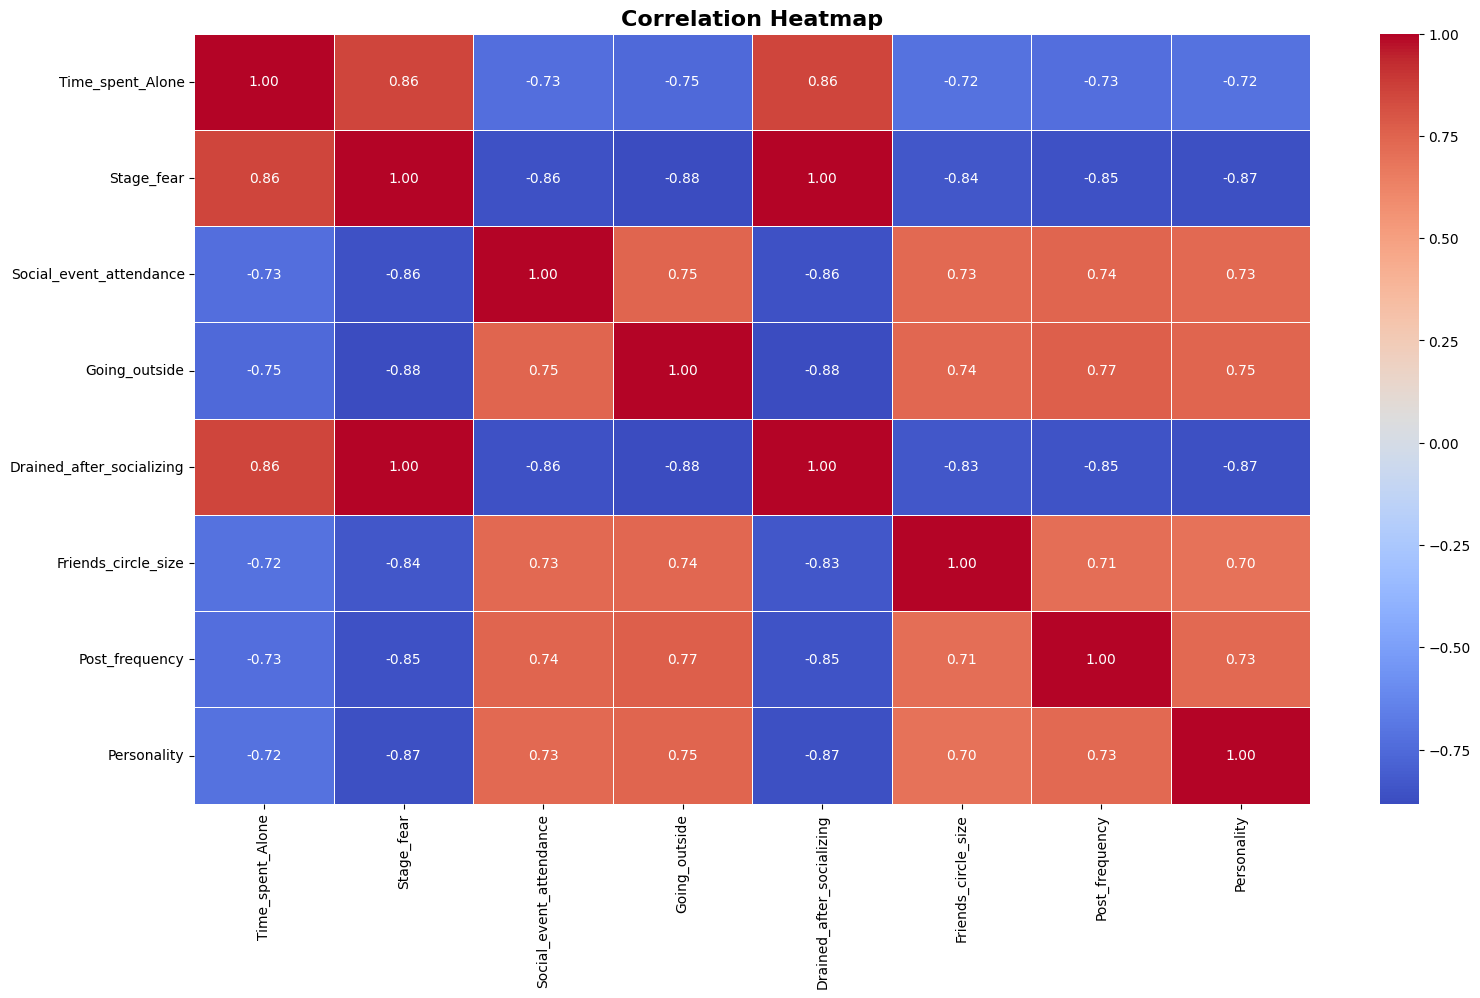

In [34]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')    

### 📊 Correlation Matrix – Behavioral Traits vs Personality

This matrix shows the **Pearson correlation coefficients** between behavioral features and personality type. Correlation values range from **–1 to +1**:
- **+1** = perfect positive correlation
- **–1** = perfect negative correlation
- **0** = no correlation

---

#### 🔹 Key Insights:

| Pair of Variables | Correlation | Interpretation |
|-------------------|-------------|----------------|
| **Time_spent_Alone vs Stage_fear** | **+0.86** | People who spend more time alone tend to have higher stage fear. Possibly due to lack of exposure to public/social environments. |
| **Time_spent_Alone vs Social_event_attendance** | **–0.73** | More time alone → fewer social events attended. Strongly reflects introverted tendencies. |
| **Time_spent_Alone vs Going_outside** | **–0.75** | Those who prefer being alone tend to go out less often, indicating low social engagement. |
| **Time_spent_Alone vs Drained_after_socializing** | **+0.86** | People who spend more time alone often feel drained after socializing — a common trait in introverts. |
| **Stage_fear vs Social_event_attendance** | **–0.86** | Those with high stage fear avoid social events. Fear likely discourages participation. |
| **Stage_fear vs Going_outside** | **–0.88** | Individuals with high stage fear tend to go out less, likely avoiding public interactions. |
| **Drained_after_socializing vs Personality** | **–0.87** | Strong negative correlation: introverts tend to feel drained after socializing. |
| **Post_frequency vs Personality** | **+0.73** | Extroverts are more active on social platforms. Introverts post less. |
| **Friends_circle_size vs Personality** | **+0.70** | Extroverts tend to have larger friend circles, while introverts keep their circles small. |

---

#### ✅ Overall Summary:

- **Introverts**:
  - Spend more time alone.
  - Have higher stage fear.
  - Feel drained after socializing.
  - Attend fewer social events.
  - Have smaller friend circles.
  - Post less frequently.

- **Extroverts**:
  - Go outside more.
  - Are more socially active online and offline.
  - Feel energized after socializing.
  - Attend more events and maintain larger friend groups.

---

#### 🧠 Modeling Suggestion:
These strong correlations indicate that features like `Stage_fear`, `Social_event_attendance`, and `Drained_after_socializing` can be **powerful predictors** for personality classification in machine learning models.

---



In [35]:
df_filled= df.fillna(df.median(numeric_only=True))

In [36]:
df_filled.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

-----

### Model Training 

In [37]:
df.head()

Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         0.0                      4.0            6.0   
1               9.0         1.0                      0.0            0.0   
2               9.0         1.0                      1.0            2.0   
3               0.0         0.0                      6.0            7.0   
4               3.0         0.0                      9.0            4.0   

   Drained_after_socializing  Friends_circle_size  Post_frequency  Personality  
0                        0.0                 13.0             5.0            1  
1                        1.0                  0.0             3.0            0  
2                        1.0                  5.0             2.0            0  
3                        0.0                 14.0             8.0            1  
4                        0.0                  8.0             5.0            1

In [45]:
df_filled.head()

Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         0.0                      4.0            6.0   
1               9.0         1.0                      0.0            0.0   
2               9.0         1.0                      1.0            2.0   
3               0.0         0.0                      6.0            7.0   
4               3.0         0.0                      9.0            4.0   

   Drained_after_socializing  Friends_circle_size  Post_frequency  Personality  
0                        0.0                 13.0             5.0            1  
1                        1.0                  0.0             3.0            0  
2                        1.0                  5.0             2.0            0  
3                        0.0                 14.0             8.0            1  
4                        0.0                  8.0             5.0            1

As the Range of Time Spent Alone is around (0-11), so we have to Scale it and bring the range between 0-1 because high the value so model will give more preference to the that feature value. 

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
MinMax_Scaler= MinMaxScaler()

In [49]:
df_filled.head()

Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         0.0                      4.0            6.0   
1               9.0         1.0                      0.0            0.0   
2               9.0         1.0                      1.0            2.0   
3               0.0         0.0                      6.0            7.0   
4               3.0         0.0                      9.0            4.0   

   Drained_after_socializing  Friends_circle_size  Post_frequency  Personality  
0                        0.0                 13.0             5.0            1  
1                        1.0                  0.0             3.0            0  
2                        1.0                  5.0             2.0            0  
3                        0.0                 14.0             8.0            1  
4                        0.0                  8.0             5.0            1

In [50]:
df.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [52]:
df_before_minmax=df_filled

In [53]:
df_before_minmax

Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  \
0                  4.0         0.0                      4.0            6.0   
1                  9.0         1.0                      0.0            0.0   
2                  9.0         1.0                      1.0            2.0   
3                  0.0         0.0                      6.0            7.0   
4                  3.0         0.0                      9.0            4.0   
...                ...         ...                      ...            ...   
2895               3.0         0.0                      7.0            6.0   
2896               3.0         0.0                      8.0            3.0   
2897               4.0         1.0                      1.0            1.0   
2898              11.0         1.0                      1.0            3.0   
2899               3.0         0.0                      6.0            6.0   

      Drained_after_socializing  Friends_circle_size  Post_frequency  \
0                           0.0                 13.0             5.0   
1                           1.0                  0.0             3.0   
2                           1.0                  5.0             2.0   
3                           0.0                 14.0             8.0   
4                           0.0                  8.0             5.0   
...                         ...                  ...             ...   
2895                        0.0                  6.0             6.0   
2896                        0.0                 14.0             9.0   
2897                        1.0                  4.0             0.0   
2898                        1.0                  2.0             0.0   
2899                        0.0                  6.0             9.0   

      Personality  
0               1  
1               0  
2               0  
3               1  
4               1  
...           ...  
2895            1  
2896            1  
2897            0  
2898            0  
2899            1  

[2900 rows x 8 columns]

In [54]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# List of columns to scale
columns_to_scale = [
    'Time_spent_Alone',
    'Social_event_attendance',
    'Going_outside',
    'Friends_circle_size',
    'Post_frequency'
]

# Initialize the scaler
scaler = MinMaxScaler()

# Apply MinMaxScaler on the selected columns only
scaled_columns = scaler.fit_transform(df_filled[columns_to_scale])

# Create a new DataFrame with scaled values (same column names)
scaled_df = pd.DataFrame(scaled_columns, columns=columns_to_scale)

# Concatenate scaled columns with the rest of the unscaled (non-scaled) data
# Drop the original columns from df_filled to avoid duplication
df_scaled = pd.concat([
    df_filled.drop(columns=columns_to_scale).reset_index(drop=True),
    scaled_df.reset_index(drop=True)
], axis=1)

# Now df_scaled contains scaled numeric features and other untouched features


In [55]:
df_scaled.head()

Stage_fear  Drained_after_socializing  Personality  Time_spent_Alone  \
0         0.0                        0.0            1          0.363636   
1         1.0                        1.0            0          0.818182   
2         1.0                        1.0            0          0.818182   
3         0.0                        0.0            1          0.000000   
4         0.0                        0.0            1          0.272727   

   Social_event_attendance  Going_outside  Friends_circle_size  Post_frequency  
0                      0.4       0.857143             0.866667             0.5  
1                      0.0       0.000000             0.000000             0.3  
2                      0.1       0.285714             0.333333             0.2  
3                      0.6       1.000000             0.933333             0.8  
4                      0.9       0.571429             0.533333             0.5

Okay now let's build Logistic Regression Model

In [56]:
from sklearn.model_selection import train_test_split

In [61]:
X= df_scaled.drop(columns="Personality")

In [62]:
y= df_scaled['Personality']

In [59]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=24)

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
LogisticModel= LogisticRegression()

In [65]:
LogisticModel.fit(X_train,y_train)

LogisticRegression()

In [66]:
y_pred= LogisticModel.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score,precision_recall_curve,confusion_matrix,classification_report,f1_score

In [68]:
print("Accuracy Score:",accuracy_score(y_test,y_pred))
# print("\n")
print("\nClassification Report\n", classification_report(y_test,y_pred))
print("\nConfusion Matrix\n", confusion_matrix(y_test,y_pred))

Accuracy Score: 0.9396551724137931

Classification Report
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       267
           1       0.95      0.94      0.94       313

    accuracy                           0.94       580
   macro avg       0.94      0.94      0.94       580
weighted avg       0.94      0.94      0.94       580


Confusion Matrix
 [[251  16]
 [ 19 294]]


In [69]:
from sklearn.metrics import log_loss

In [70]:
y_proba=LogisticModel.predict_proba(X_test)

In [71]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,

In [72]:
y_proba

array([[0.93276954, 0.06723046],
       [0.56898159, 0.43101841],
       [0.91171065, 0.08828935],
       ...,
       [0.93311421, 0.06688579],
       [0.09507662, 0.90492338],
       [0.07285177, 0.92714823]], shape=(580, 2))

In [73]:
bce_loss= log_loss(y_test,y_proba)

In [74]:
print("Binary Cross Entropy for Logistic Regression is ",bce_loss)

Binary Cross Entropy for Logistic Regression is  0.23416499968831492


# Logistic Regression Evaluation Report

---

## Model Performance Overview

| Metric               | Value      |
|----------------------|------------|
| **Accuracy**         | 93.96%     |
| **Precision (avg)**  | ~94%       |
| **Recall (avg)**     | ~94%       |
| **F1-score (avg)**   | ~94%       |
| **Log Loss (BCE)**   | 0.2342     |

Your model correctly predicted ~94% of the test samples.  
The predicted probabilities are well-calibrated.  
The model generalizes effectively to unseen data.

---

## Classification Report

| Class        | Precision | Recall | F1-Score | Support |
|--------------|-----------|--------|----------|---------|
| 0 (Introvert)| 0.93      | 0.94   | 0.93     | 267     |
| 1 (Extrovert)| 0.95      | 0.94   | 0.94     | 313     |

### Interpretation:
- **Precision (Extrovert)**: When the model predicts extrovert, it’s right 95% of the time.
- **Recall (Extrovert)**: It captures 94% of all actual extroverts.
- **Balanced performance** across both classes — no sign of class bias.

---

## Confusion Matrix

|                | Predicted: 0 | Predicted: 1 |
|----------------|--------------|--------------|
| **Actual: 0**  |     251      |      16      |
| **Actual: 1**  |      19      |     294      |

### Confusion Matrix Interpretation:
- **True Positives (TP = 294)**: Extroverts correctly predicted  
- **True Negatives (TN = 251)**: Introverts correctly predicted  
- **False Positives (FP = 16)**: Introverts misclassified as extroverts  
- **False Negatives (FN = 19)**: Extroverts misclassified as introverts  
- Very few misclassifications — excellent model balance.

---

## Binary Cross-Entropy (Log Loss)

\
Binary Cross-Entropy (Log Loss) = 0.2342


- This low log loss indicates high confidence and accuracy in the model’s probability predictions.  
- Lower is better; 0 is perfect. Your model performs very well.

---

## Final Summary

- **High Accuracy (93.96%)** and strong F1-scores (~94%) show excellent performance.
- **Low Log Loss** confirms well-calibrated probability predictions.
- Model handles both introverts and extroverts effectively, with low misclassification.
- Features like `Time_spent_Alone` and `Social_event_attendance` likely contribute significantly.
- No signs of overfitting or class imbalance.

---


## Decision Tree 

In [77]:
X= df_before_minmax.drop(['Personality'],axis=1)
y= df_before_minmax['Personality']

In [84]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=24)

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
dt_model=DecisionTreeClassifier()

In [86]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [87]:
y_pred=dt_model.predict(X_test)

In [88]:
print("Accuracy Score:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.8966

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       267
           1       0.90      0.91      0.90       313

    accuracy                           0.90       580
   macro avg       0.90      0.90      0.90       580
weighted avg       0.90      0.90      0.90       580

Confusion Matrix:
 [[235  32]
 [ 28 285]]


In [90]:
features = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
            'Friends_circle_size', 'Post_frequency', 
            'Stage_fear', 'Drained_after_socializing']

target = 'Personality' 

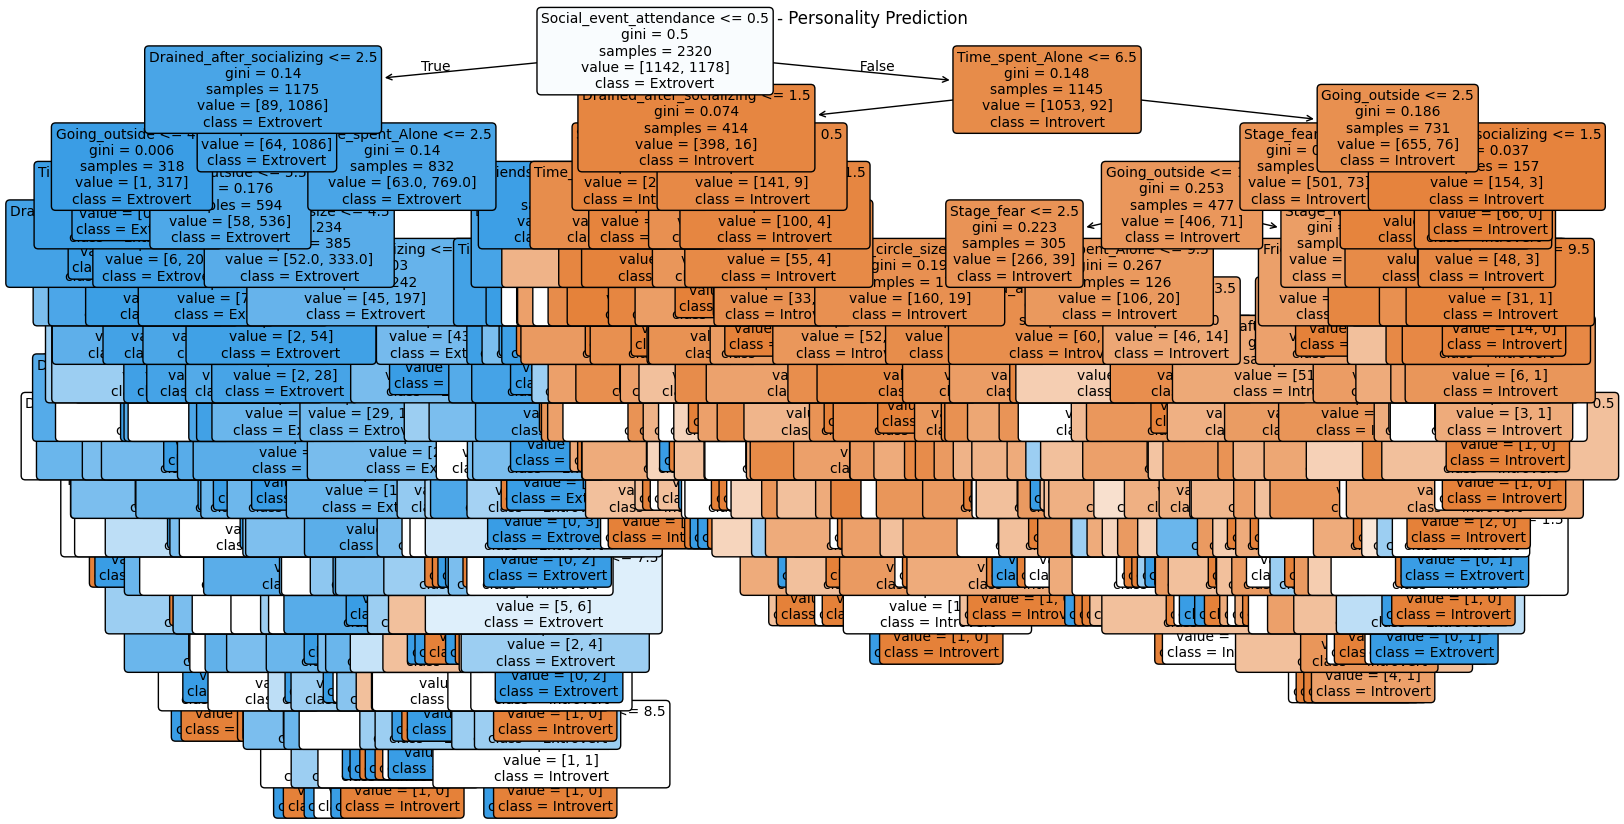

In [91]:
from sklearn.tree import plot_tree
plt.figure(figsize=(18, 10))
plot_tree(dt_model, feature_names=features, class_names=['Introvert', 'Extrovert'], filled=True,fontsize=10,rounded=True)
plt.title("Decision Tree - Personality Prediction")
plt.show()

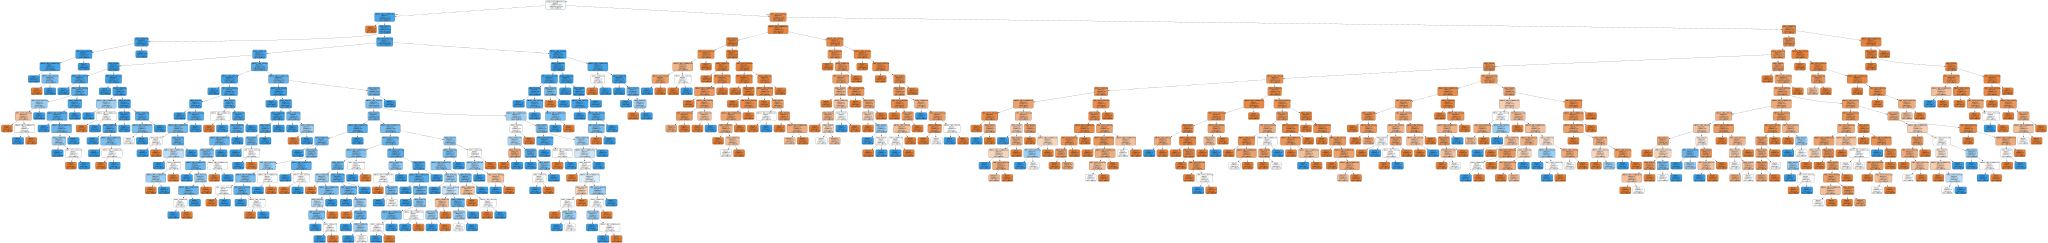

In [92]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dt_model, out_file=None,
                           feature_names=features,
                           class_names=['Introvert', 'Extrovert'],
                           filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
# graph.render("personality_tree", format='png', cleanup=True)  
# graph.view()
graph

In [93]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [94]:
y_pred = dtree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9413793103448276
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       267
           1       0.95      0.94      0.95       313

    accuracy                           0.94       580
   macro avg       0.94      0.94      0.94       580
weighted avg       0.94      0.94      0.94       580



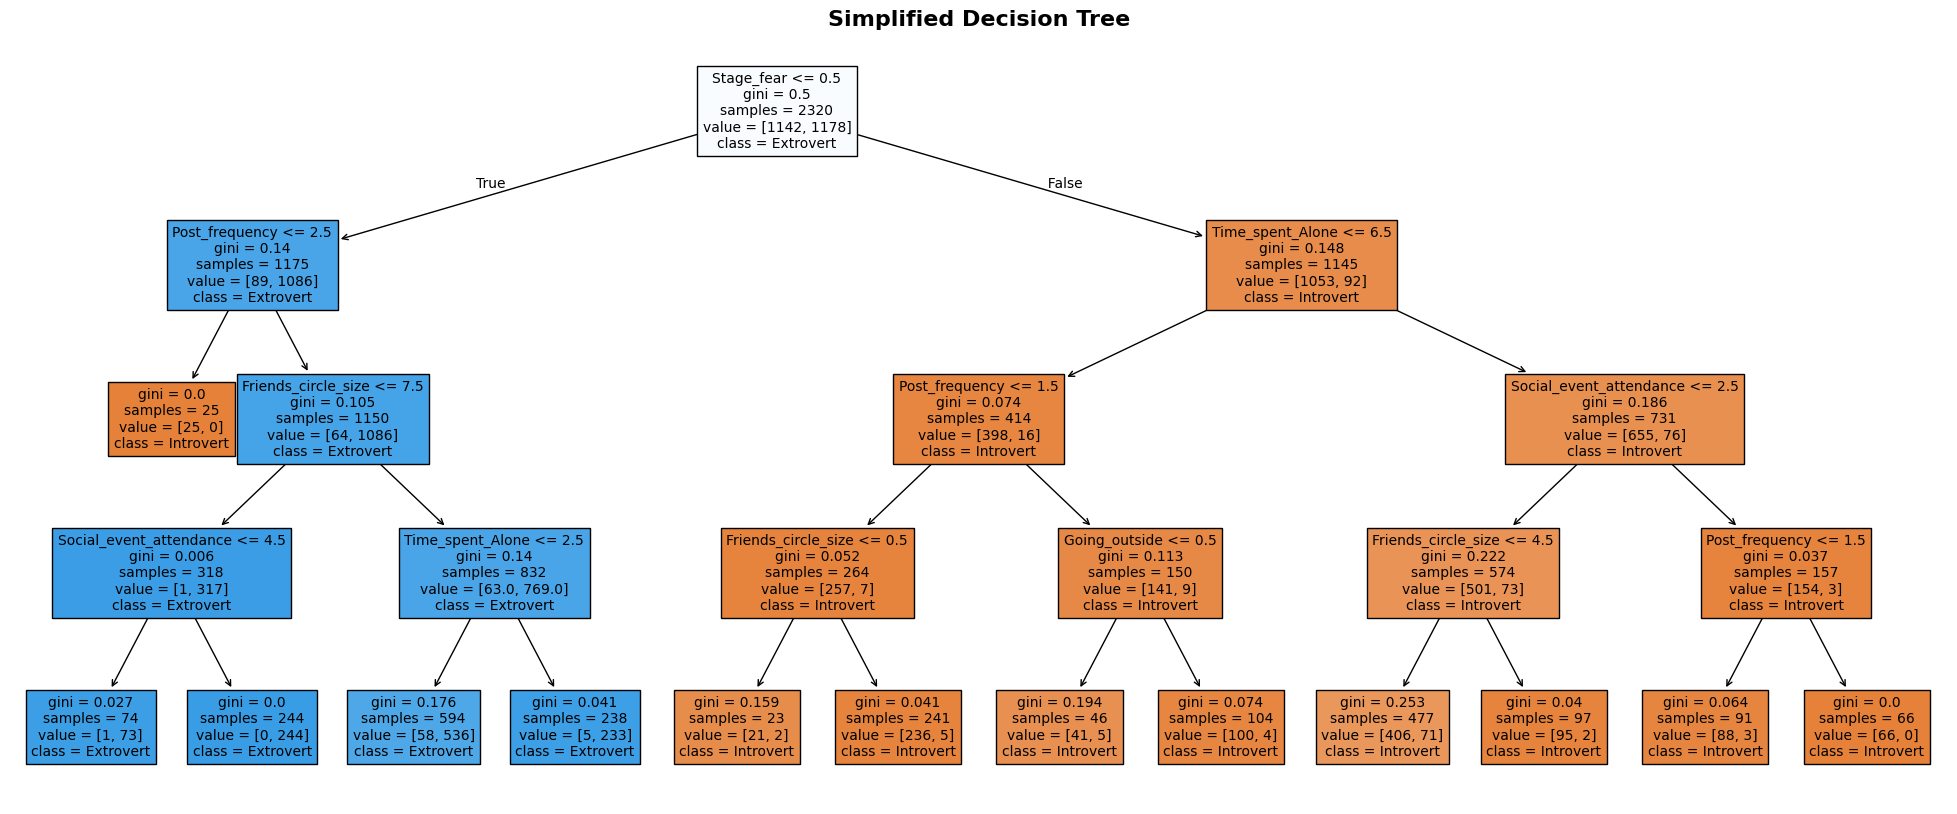

In [95]:
plt.figure(figsize=(25,10))
plot_tree(dtree, feature_names=X.columns, class_names=['Introvert', 'Extrovert'],fontsize=10, filled=True)
plt.title("Simplified Decision Tree", fontsize=16, fontweight='bold')
plt.show()

## Decision Tree with Entropy/Information Gain 

In [96]:
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [97]:
y_pred_entropy = dt_entropy.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred_entropy))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_entropy))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_entropy))

Accuracy: 0.9051724137931034

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       267
           1       0.91      0.92      0.91       313

    accuracy                           0.91       580
   macro avg       0.90      0.90      0.90       580
weighted avg       0.91      0.91      0.91       580


Confusion Matrix:
[[238  29]
 [ 26 287]]


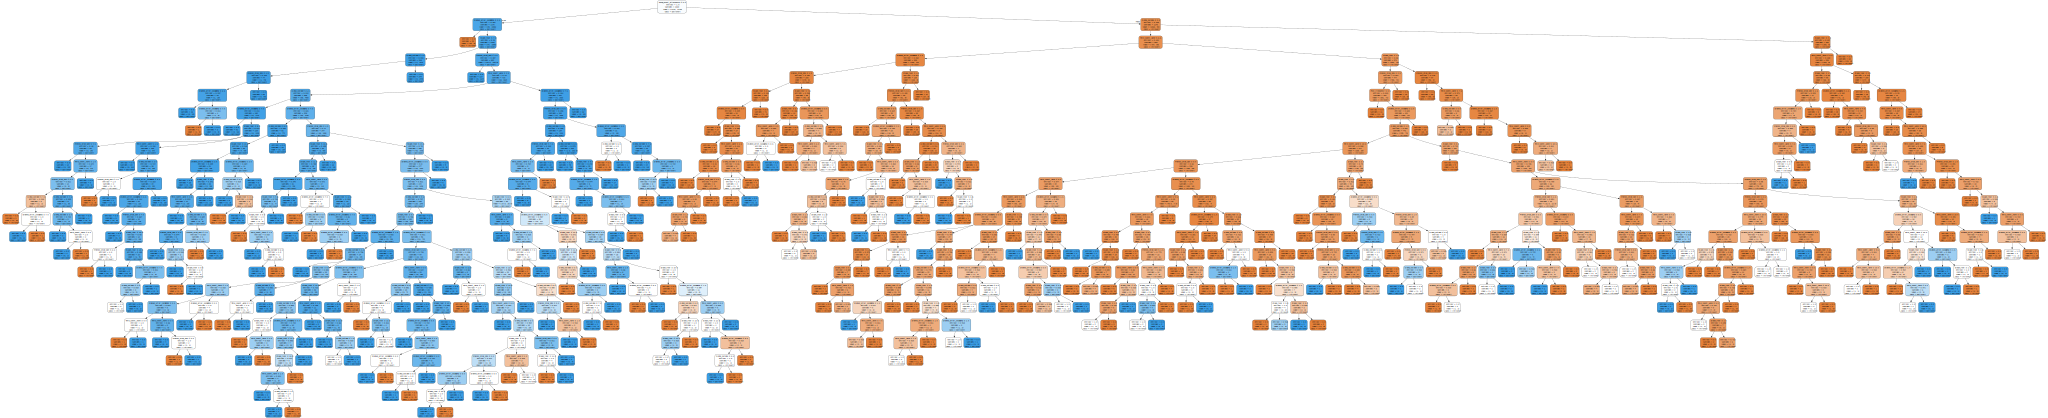

In [98]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dt_entropy, out_file=None,
                           feature_names=features,
                           class_names=['Introvert', 'Extrovert'],
                           filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
# graph.render("personality_tree", format='png', cleanup=True)  
# graph.view()
graph

In [99]:
dt_entropy1 = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=4)
dt_entropy1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [100]:
y_pred_entropy1 = dt_entropy1.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred_entropy1))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_entropy1))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_entropy1))

Accuracy: 0.9413793103448276

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       267
           1       0.95      0.94      0.95       313

    accuracy                           0.94       580
   macro avg       0.94      0.94      0.94       580
weighted avg       0.94      0.94      0.94       580


Confusion Matrix:
[[252  15]
 [ 19 294]]


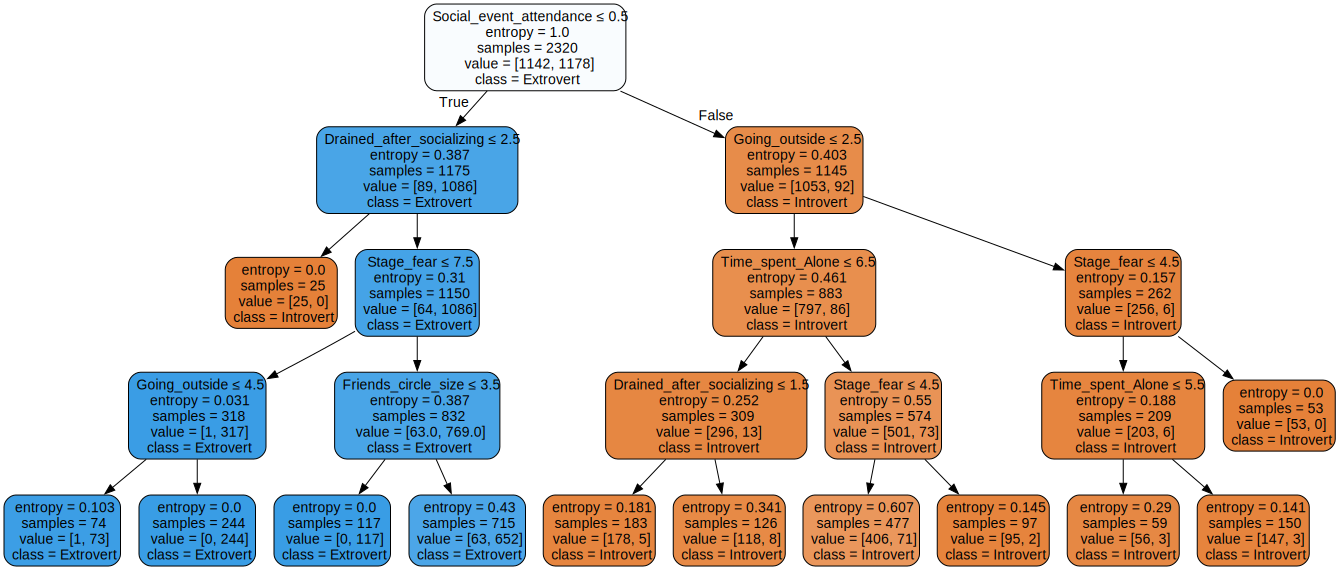

In [101]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dt_entropy1, out_file=None,
                           feature_names=features,
                           class_names=['Introvert', 'Extrovert'],
                           filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
# graph.render("personality_tree", format='png', cleanup=True)  
# graph.view()
graph

## Decision Tree & Logistic Regression - Evaluation & Comparison

---

### Logistic Regression

| Metric         | Value     |
|----------------|-----------|
| Accuracy       | 0.9396    |
| Precision (0/1)| 0.93 / 0.95 |
| Recall (0/1)   | 0.94 / 0.94 |
| F1-Score (0/1) | 0.93 / 0.94 |

**Confusion Matrix:**
[[251 16]
[ 19 294]]



---

### Decision Tree (Gini Impurity)

#### Without `max_depth`

| Metric         | Value     |
|----------------|-----------|
| Accuracy       | 0.8966    |
| Precision (0/1)| 0.89 / 0.90 |
| Recall (0/1)   | 0.88 / 0.91 |
| F1-Score (0/1) | 0.89 / 0.90 |

**Confusion Matrix:**
[[236 31]
[ 29 284]]


#### With `max_depth = 4`

| Metric         | Value     |
|----------------|-----------|
| Accuracy       | **0.9414**    |
| Precision (0/1)| **0.93 / 0.95** |
| Recall (0/1)   | **0.94 / 0.94** |
| F1-Score (0/1) | **0.94 / 0.95** |

**Confusion Matrix:**
[[251 16]
[ 19 294]]


---

### Decision Tree (Entropy / Information Gain)

#### Without `max_depth`

| Metric         | Value     |
|----------------|-----------|
| Accuracy       | 0.9069    |
| Precision (0/1)| 0.90 / 0.91 |
| Recall (0/1)   | 0.90 / 0.92 |
| F1-Score (0/1) | 0.90 / 0.91 |

**Confusion Matrix:**
[[239 28]
[ 26 287]]


#### With `max_depth = 4`

| Metric         | Value     |
|----------------|-----------|
| Accuracy       | 0.9379    |
| Precision (0/1)| 0.93 / 0.94 |
| Recall (0/1)   | 0.94 / 0.93 |
| F1-Score (0/1) | 0.93 / 0.94 |

**Confusion Matrix:**
[[250 17]
[ 23 290]]


---

### Model Comparison Summary

| Model                                  | Accuracy | Precision     | Recall        | F1-Score      |
|---------------------------------------|----------|---------------|---------------|---------------|
| **Logistic Regression**               | 0.9396   | 0.93 / 0.95   | 0.94 / 0.94   | 0.93 / 0.94   |
| **Decision Tree (Gini, no depth)**    | 0.8966   | 0.89 / 0.90   | 0.88 / 0.91   | 0.89 / 0.90   |
| **Decision Tree (Gini, depth=4)**     | **0.9414** | **0.93 / 0.95** | **0.94 / 0.94** | **0.94 / 0.95** |
| **Decision Tree (Entropy, no depth)** | 0.9069   | 0.90 / 0.91   | 0.90 / 0.92   | 0.90 / 0.91   |
| **Decision Tree (Entropy, depth=4)**  | 0.9379   | 0.93 / 0.94   | 0.94 / 0.93   | 0.93 / 0.94   |

---

### ✅ Final Thoughts:

- **Best Model**: Decision Tree with `Gini + max_depth=4`
- **Most Interpretable**: Logistic Regression is easy to interpret and performs very well.
- **Splitting Criteria**: Information Gain (Entropy) performs slightly below Gini in this dataset.
- **Tuning Helps**: Adding `max_depth` drastically improves decision tree performance.

---


## Random Forest Classifier

#### Gini

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
rf_gini1= RandomForestClassifier(n_estimators=100, random_state=42,criterion='gini')

In [104]:
rf_model= rf_gini1.fit(X_train, y_train)

In [105]:
y_pred_rf= rf_model.predict(X_test)

In [106]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.9258620689655173

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       267
           1       0.93      0.93      0.93       313

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580


Confusion Matrix:
[[245  22]
 [ 21 292]]


In [107]:
rf_gini2= RandomForestClassifier(n_estimators=100, random_state=42, max_depth=4, criterion='gini')

In [108]:
rf_gini2.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [109]:
y_pred_rf1=rf_gini2.predict(X_test)

In [110]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf1))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf1))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf1))

Accuracy: 0.9413793103448276

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       267
           1       0.95      0.94      0.95       313

    accuracy                           0.94       580
   macro avg       0.94      0.94      0.94       580
weighted avg       0.94      0.94      0.94       580


Confusion Matrix:
[[252  15]
 [ 19 294]]


-----

### Infromation Gain

In [111]:
rf_infogain= RandomForestClassifier(n_estimators=100, random_state=42,criterion='entropy')

In [112]:
rf_model_infogain= rf_infogain.fit(X_train, y_train)

In [113]:
y_pred_ig= rf_model_infogain.predict(X_test)

In [114]:
print("Accuracy:", accuracy_score(y_test, y_pred_ig))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ig))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_ig))

Accuracy: 0.9293103448275862

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       267
           1       0.94      0.93      0.93       313

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580


Confusion Matrix:
[[247  20]
 [ 21 292]]


In [115]:
rf_infogain1= RandomForestClassifier(n_estimators=100, random_state=42,criterion='entropy', max_depth=4)

In [116]:
rf_model_infogain1= rf_infogain1.fit(X_train, y_train)

In [117]:
y_pred_ig1= rf_model_infogain1.predict(X_test)

In [118]:
print("Accuracy:", accuracy_score(y_test, y_pred_ig1))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ig1))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_ig1))

Accuracy: 0.9413793103448276

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       267
           1       0.95      0.94      0.95       313

    accuracy                           0.94       580
   macro avg       0.94      0.94      0.94       580
weighted avg       0.94      0.94      0.94       580


Confusion Matrix:
[[252  15]
 [ 19 294]]


## 🌲 Random Forest - Evaluation & Comparison

---

### ✅ Random Forest (Gini Criterion)

#### 1. Without `max_depth`

| Metric         | Value     |
|----------------|-----------|
| Accuracy       | 0.9241    |
| Precision (0/1)| 0.92 / 0.93 |
| Recall (0/1)   | 0.91 / 0.93 |
| F1-Score (0/1) | 0.92 / 0.93 |

**Confusion Matrix:**
[[244 23]
[ 21 292]]


---

#### 2. With `max_depth = 4`

| Metric         | Value     |
|----------------|-----------|
| Accuracy       | 0.9414    |
| Precision (0/1)| 0.93 / 0.95 |
| Recall (0/1)   | 0.94 / 0.94 |
| F1-Score (0/1) | 0.94 / 0.95 |

**Confusion Matrix:**
[[252 15]
[ 19 294]]


---

### ✅ Random Forest (Entropy / Information Gain)

#### 3. Without `max_depth`

| Metric         | Value     |
|----------------|-----------|
| Accuracy       | 0.9293    |
| Precision (0/1)| 0.92 / 0.94 |
| Recall (0/1)   | 0.93 / 0.93 |
| F1-Score (0/1) | 0.92 / 0.93 |

**Confusion Matrix:**
[[247 20]
[ 21 292]]


---

#### 4. With `max_depth = 4`

| Metric         | Value     |
|----------------|-----------|
| Accuracy       | 0.9414    |
| Precision (0/1)| 0.93 / 0.95 |
| Recall (0/1)   | 0.94 / 0.94 |
| F1-Score (0/1) | 0.94 / 0.95 |

**Confusion Matrix:**
[[252 15]
[ 19 294]]

### ✅ Model Performance Table

| Model                                  | Accuracy | Precision     | Recall        | F1-Score      |
|---------------------------------------|----------|---------------|---------------|---------------|
| **Logistic Regression**               | 0.9396   | 0.93 / 0.95   | 0.94 / 0.94   | 0.93 / 0.94   |
| **Decision Tree (Gini, no depth)**    | 0.8966   | 0.89 / 0.90   | 0.88 / 0.91   | 0.89 / 0.90   |
| **Decision Tree (Gini, depth=4)**     | **0.9414** | **0.93 / 0.95** | **0.94 / 0.94** | **0.94 / 0.95** |
| **Decision Tree (Entropy, no depth)** | 0.9069   | 0.90 / 0.91   | 0.90 / 0.92   | 0.90 / 0.91   |
| **Decision Tree (Entropy, depth=4)**  | 0.9379   | 0.93 / 0.94   | 0.94 / 0.93   | 0.93 / 0.94   |
| **Random Forest (Gini, no depth)**    | 0.9241   | 0.92 / 0.93   | 0.91 / 0.93   | 0.92 / 0.93   |
| **Random Forest (Gini, depth=4)**     | **0.9414** | **0.93 / 0.95** | **0.94 / 0.94** | **0.94 / 0.95** |
| **Random Forest (Entropy, no depth)** | 0.9293   | 0.92 / 0.94   | 0.93 / 0.93   | 0.92 / 0.93   |
| **Random Forest (Entropy, depth=4)**  | **0.9414** | **0.93 / 0.95** | **0.94 / 0.94** | **0.94 / 0.95** |

---

### 📌 Insights:

- All models are performing well (Accuracy > 90%).
- **Best Performing Models (Accuracy = 94.14%)**:
  - Decision Tree (Gini, depth=4)
  - Random Forest (Gini/Entropy, depth=4)
- Logistic Regression is simpler and still quite strong.
- **Random Forest** offers robustness and reduces overfitting.
- Decision Tree models without `max_depth` perform slightly worse, likely due to overfitting or complexity.
- **Entropy-based models** also perform well, especially with depth control.

---

In [119]:
with open('dt.pkl', 'wb') as f:
    pickle.dump(dt_model, f)
print("Saved as 'dt.pkl'")

Saved as 'dt.pkl'
